In [4]:
#Terminal check
import sys
sys.executable

'c:\\Users\\Radhika Ranganathan\\Desktop\\Guvi Class\\Projects\\Mini project 3\\.venv\\Scripts\\python.exe'

In [5]:
# Step 1: Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Step 2: Data load, preview and assessments
df = pd.read_csv("Employee-Attrition.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Step 3: Data cleaning and preparation
df.isnull()
df.isnull().sum()
df.isnull().sum().sum()
missing_strings = ["NA", "N/A", "null", "NULL", "?", "Unknown", "Not Available"]
df.isin(missing_strings).sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Step 4: Keep only the required columns
col_keep = [
    "Attrition", #target
    # Demographics
    "Age",
    "Gender",
    "MaritalStatus",
    "DistanceFromHome",
    "Education",
    "EducationField",
    # Job & Organization
    "Department",
    "JobRole",
    "JobLevel",
    "BusinessTravel",
    "OverTime",
    # Compensation
    "MonthlyIncome",
    "StockOptionLevel",
    # Satisfaction & Engagement
    "JobSatisfaction",
    "EnvironmentSatisfaction",
    "RelationshipSatisfaction",
    "WorkLifeBalance",
    "JobInvolvement",
    # Tenure & Career Growth
    "YearsAtCompany",
    "YearsSinceLastPromotion",
    "NumCompaniesWorked"
]
df_sub = df[col_keep].copy()
df_sub.shape


(1470, 22)

In [9]:
# Step 5: Distribution of numeric and categorical columns in the reduced dataset
df_sub.info()
num_cols = df_sub.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df_sub.select_dtypes(include="object").columns.tolist()

print("Numeric Columns:", num_cols)
print("Categorical Columns:", cat_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   MaritalStatus             1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   Department                1470 non-null   object
 8   JobRole                   1470 non-null   object
 9   JobLevel                  1470 non-null   int64 
 10  BusinessTravel            1470 non-null   object
 11  OverTime                  1470 non-null   object
 12  MonthlyIncome             1470 non-null   int64 
 13  StockOptionLevel          1470 non-null   int64 
 14  JobSatisfaction         

In [10]:
# Summary statistics - numeric columns
df_sub[num_cols].describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,StockOptionLevel,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,JobInvolvement,YearsAtCompany,YearsSinceLastPromotion,NumCompaniesWorked
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.063946,6502.931293,0.793878,2.728571,2.721769,2.712245,2.761224,2.729932,7.008163,2.187755,2.693197
std,9.135373,8.106864,1.024165,1.106940,4707.956783,0.852077,1.102846,1.093082,1.081209,0.706476,0.711561,6.126525,3.222430,2.498009
min,18.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,2911.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000,1.000000
50%,36.000000,7.000000,3.000000,2.000000,4919.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,1.000000,2.000000
75%,43.000000,14.000000,4.000000,3.000000,8379.000000,1.000000,4.000000,4.000000,4.000000,3.000000,3.000000,9.000000,3.000000,4.000000
max,60.000000,29.000000,5.000000,5.000000,19999.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,40.000000,15.000000,9.000000


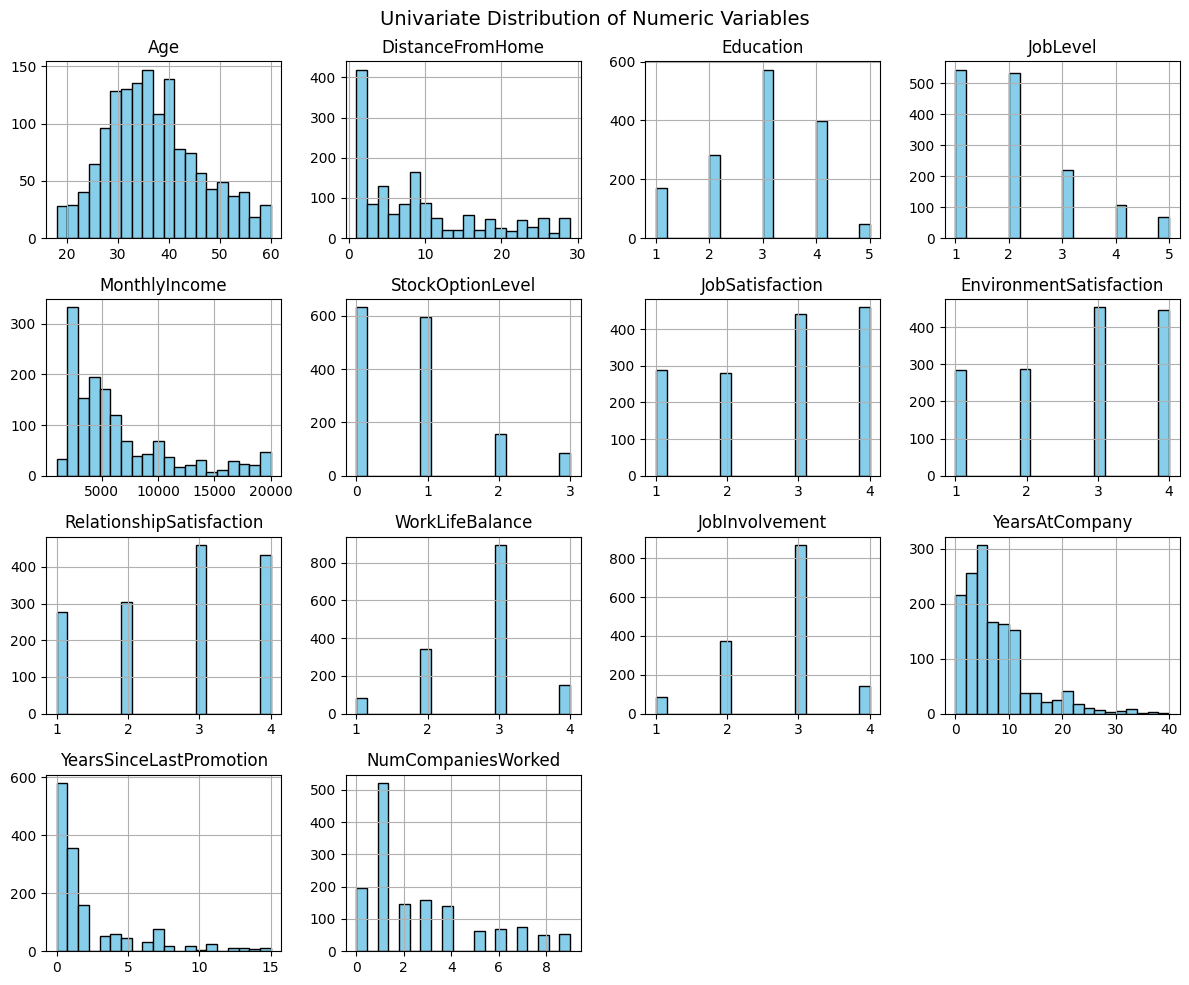

In [11]:
# Step 6a: Univariate analysis (numeric variables distribution)
df_sub[num_cols].hist(
    figsize=(12, 10),
    bins=20,
    color="skyblue",
    edgecolor="black"
)

plt.suptitle("Univariate Distribution of Numeric Variables", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Step 6a: interpretation
# Age shows an approximately normal distribution, with most employees in the 30–40 year range.
# DistanceFromHome is right-skewed, with most employees living closer to work and a smaller group commuting long distances.
# MonthlyIncome is highly right-skewed, reflecting a few high-income senior roles and a larger concentration of mid-level salaries.
# YearsAtCompany and YearsSinceLastPromotion exhibit right-skewed distributions.
# NumCompaniesWorked is skewed toward lower values.
# JobLevel and Education are discrete and ordinal, with most employees concentrated in lower to mid levels.
# Satisfaction-related variables (JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction, WorkLifeBalance, JobInvolvement) are ordinal and discrete, with higher frequencies at levels 3 and 4.
# StockOptionLevel is heavily concentrated at lower levels, suggesting limited long-term financial incentives for most employees.

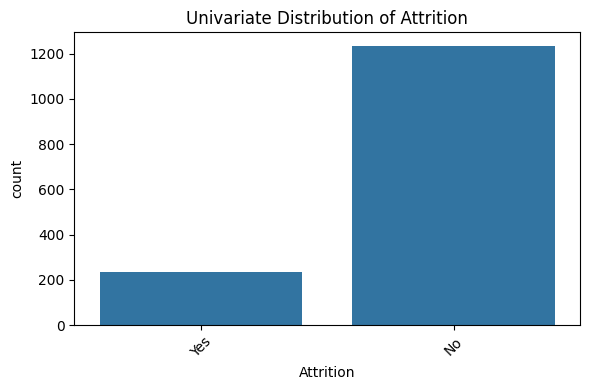

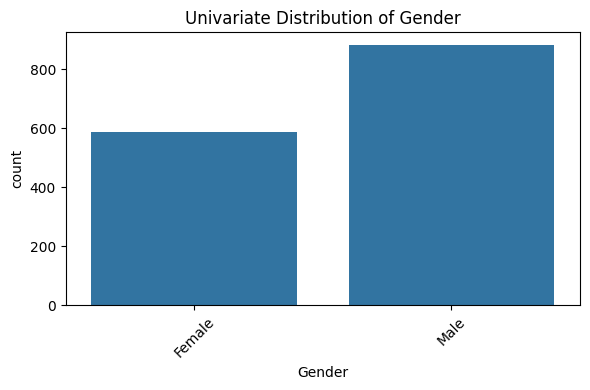

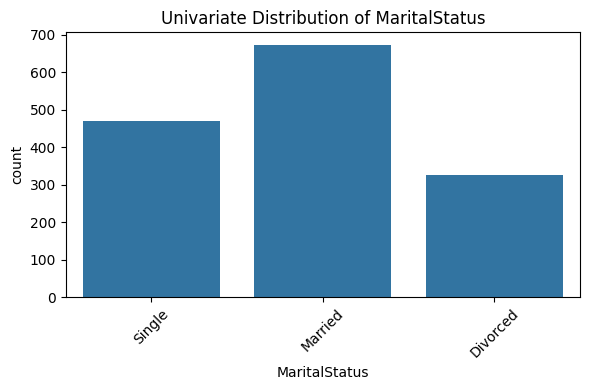

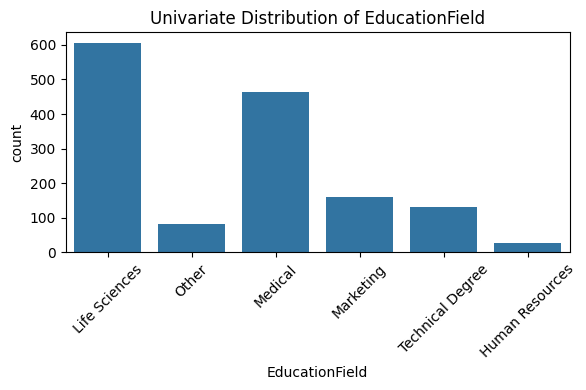

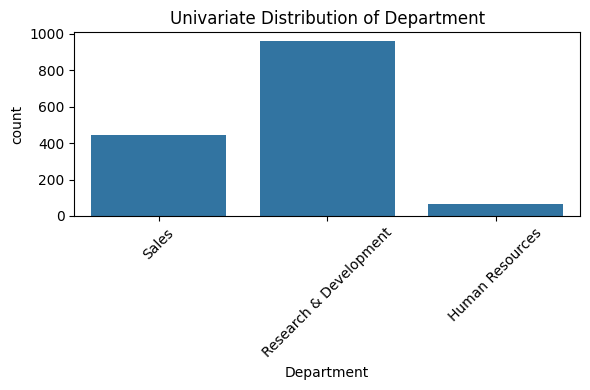

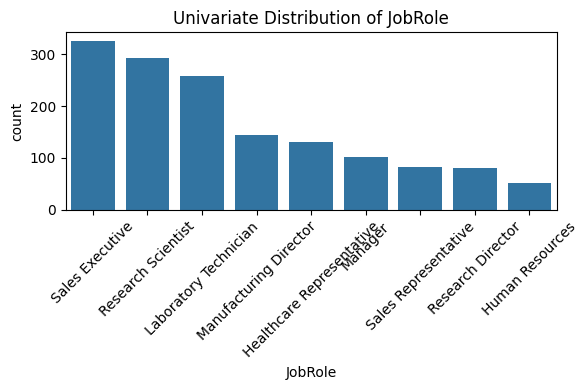

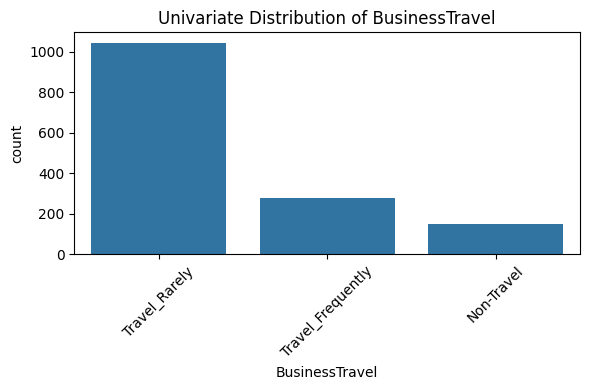

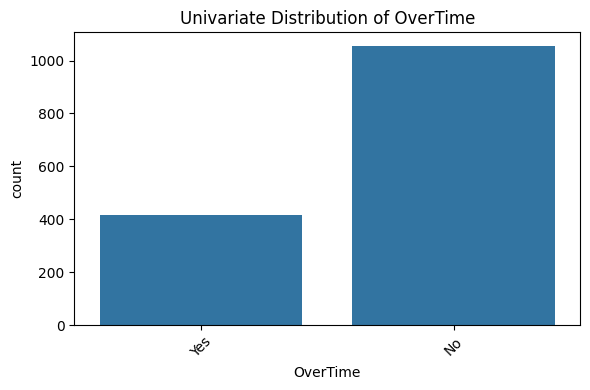

In [12]:
# Step 6b: Univariate analysis (categorical variables distribution)
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df_sub)
    plt.title(f"Univariate Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Step 6b Interpretation
# The target (attrition) distribution shows class imbalance, with a higher proportion of employees 
# staying in the organization. Other categorical features display varying category distributions, reflecting
# workforce composition and potential imbalance across groups.

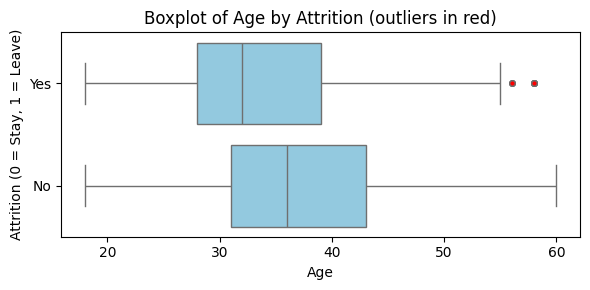

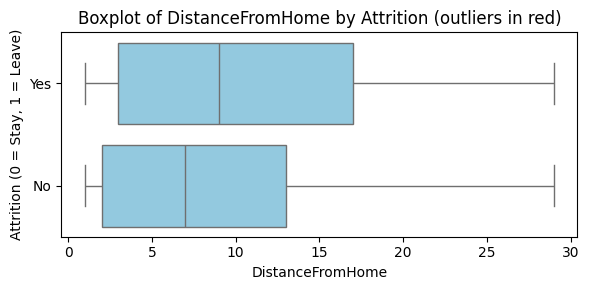

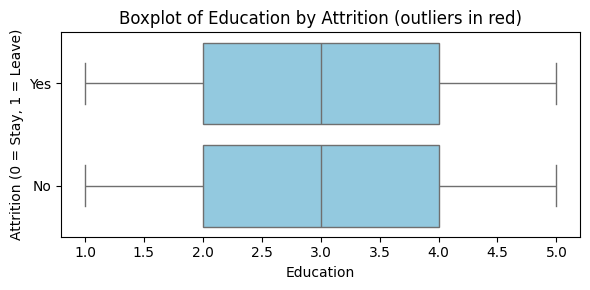

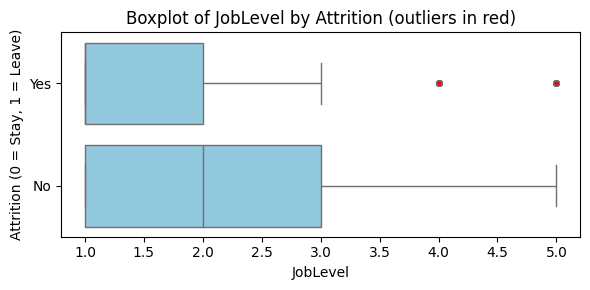

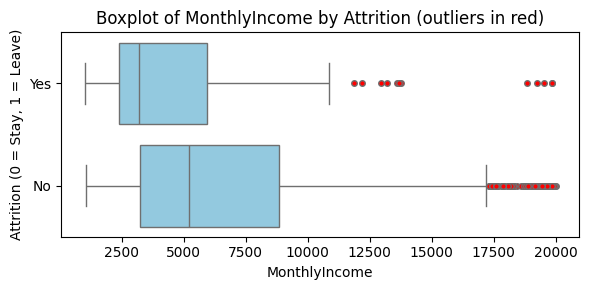

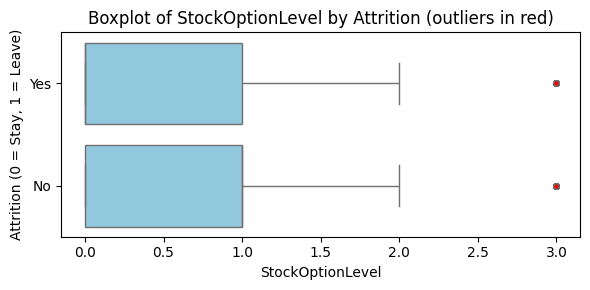

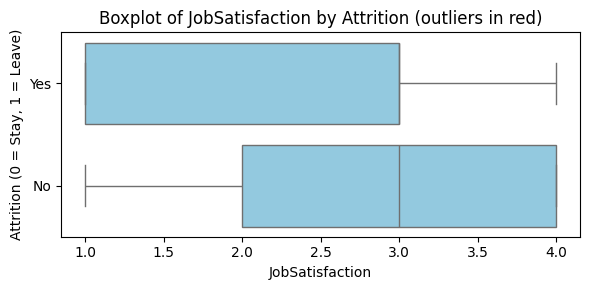

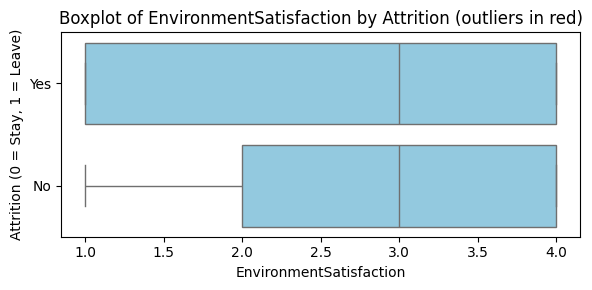

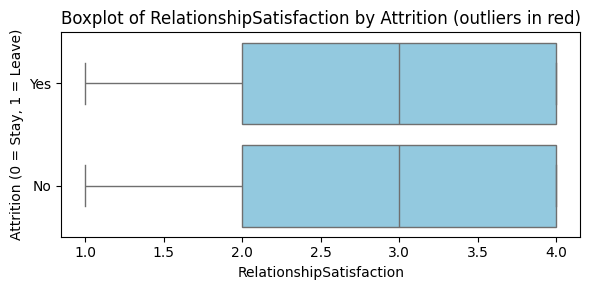

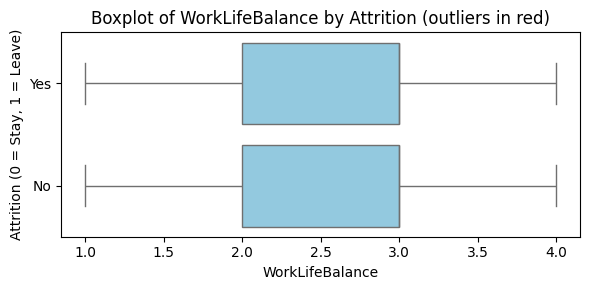

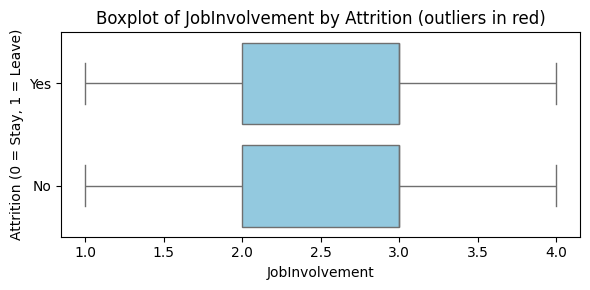

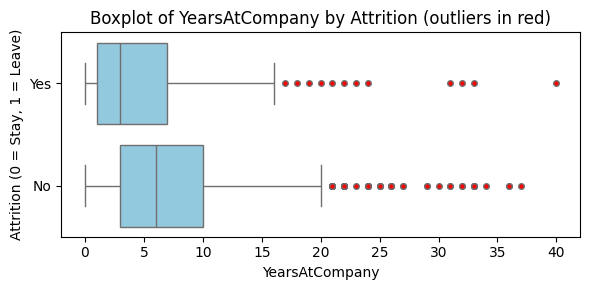

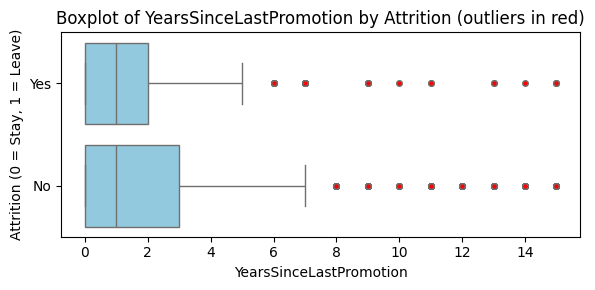

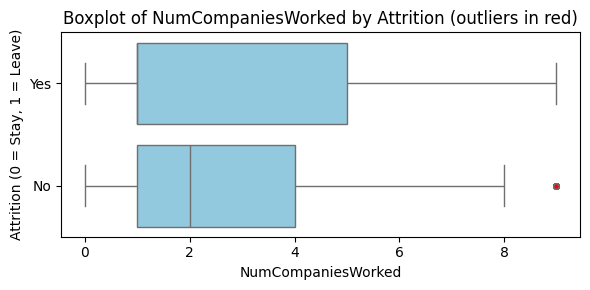

In [13]:
#Step 7a: Bivariate analysis [Box plot of Attrition (target) vs. Numeric variables]
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(
        y=df_sub['Attrition'],      # categorical target on y-axis
        x=df_sub[col],              # numerical predictor on x-axis
        color='skyblue',
        flierprops=dict(
            marker='o',
            markerfacecolor='red',
            markersize=4
        )
    )
    plt.title(f'Boxplot of {col} by Attrition (outliers in red)')
    plt.xlabel(col)
    plt.ylabel('Attrition (0 = Stay, 1 = Leave)')
    plt.tight_layout()
    plt.show()


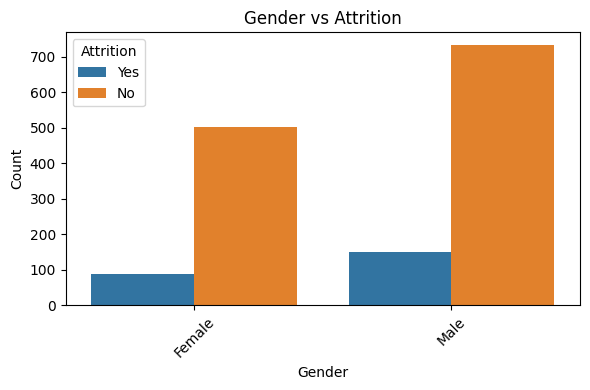

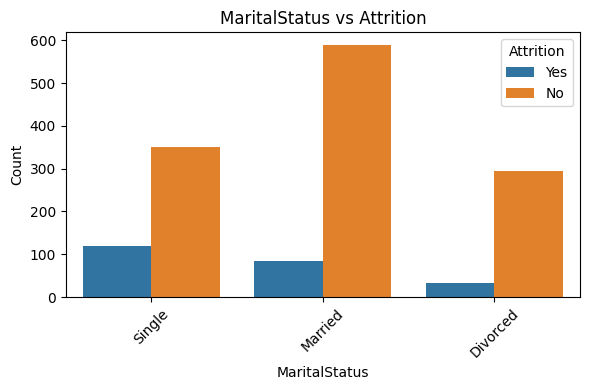

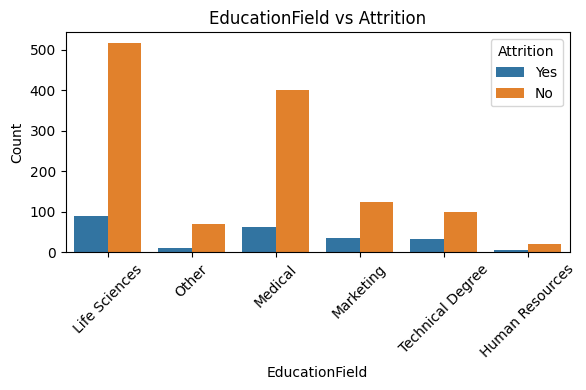

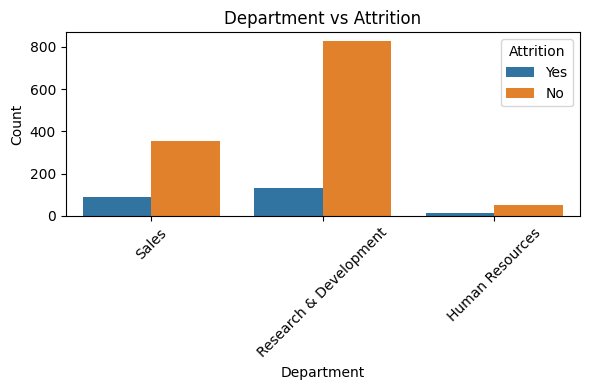

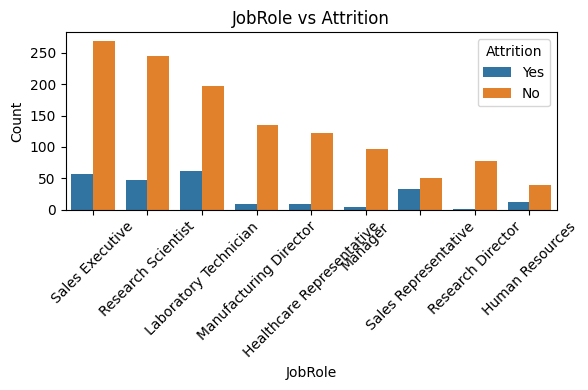

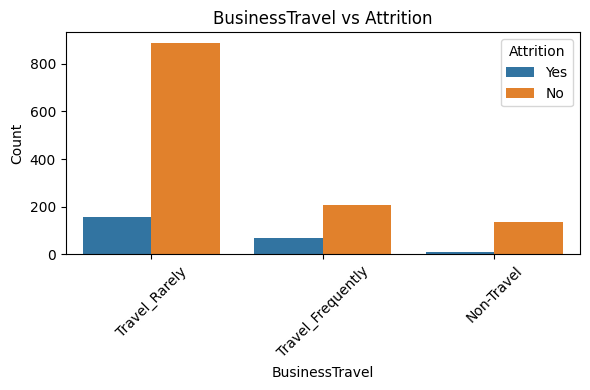

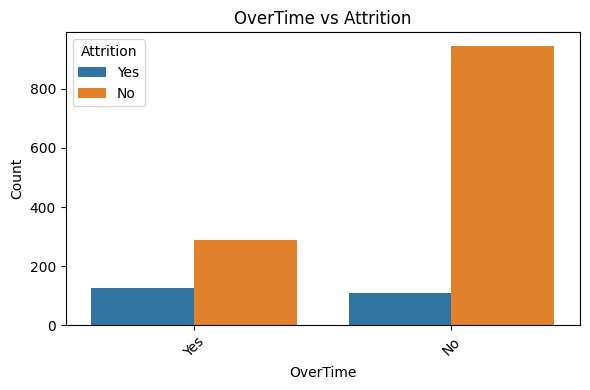

In [14]:
#Step 7b: Bivariate analysis [Count plot of Attrition (target) vs. Categorical variables]
cat_bivariate_cols = [col for col in cat_cols if col != "Attrition"]
for col in cat_bivariate_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df_sub[col], hue=df_sub["Attrition"])
    plt.title(f"{col} vs Attrition")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [15]:
# Step 8: Outlier analysis
outlier_summary = []

for col in num_cols:
    Q1 = df_sub[col].quantile(0.25)
    Q3 = df_sub[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    count = df_sub[(df_sub[col] < lower) | (df_sub[col] > upper)].shape[0]
    outlier_summary.append([col, count])

outlier_df = pd.DataFrame(outlier_summary, columns=["Feature", "Outlier_Count"])
outlier_df

,Feature,Outlier_Count
0,Age,0
1,DistanceFromHome,0
2,Education,0
3,JobLevel,0
4,MonthlyIncome,114
5,StockOptionLevel,85
6,JobSatisfaction,0
7,EnvironmentSatisfaction,0
8,RelationshipSatisfaction,0
9,WorkLifeBalance,0


In [ ]:
# Step 8 Outlier analysis continued...
# Outliers were detected primarily in variables such as MonthlyIncome, StockOptionLevel, YearsAtCompany, YearsSinceLastPromotion,
# and NumCompaniesWorked. These values represent valid business scenarios. For example: senior employees, long-term tenured staff, and
# job transition behavior of the employees. No outliers were found in bounded ordinal variables such as satisfaction scores
# or job levels etc. Outlier handling techniques such as trimming, capping and imputation were not applied because the detected
# outliers represent valid business scenarios. Removing or altering these values would distort real patterns and reduce the 
# model's ability to generalize.Therefore, outliers were retained for robust classification modeling.


In [16]:
# Step 9: Feature Engineering
#Seperate target column and feature columns in the dataset
target_col = "Attrition"

X = df_sub.drop(target_col, axis=1)
y = df_sub[target_col]

In [17]:
# Step 9a: Fix numeric and categorical columns
num_cols_model = num_cols.copy()
cat_cols_model = [col for col in cat_cols if col != target_col]

In [18]:
# Step 9b: Numeric feature engineering
# Simple imputer (median), standard scalar technique
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
# Justification: Standard scalar is required for Logistic Regression and improves numerical stability.

In [19]:
# Step 9c: Categorical feature engineering
# (Most frequent imputation, one hot encoding)
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [20]:
# Step 9d: Combine feature engineering
# We use column transfer to make sure the correct preprocessing technique is assigned to each feature type safely.
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols_model),
    ("cat", cat_pipeline, cat_cols_model)
])
# Numeric features were median-imputed and standardized using StandardScaler,
# Categorical features were imputed with the most frequent category and
# encoded using One-Hot Encoding to ensure model compatibility.

In [21]:
# Step 10: Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [22]:
df_sub['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [23]:
# Step 11: Preprocessing and smote (to balance data)
from imblearn.over_sampling import SMOTE
from collections import Counter
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

print("Before SMOTE:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_prep, y_train)

print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({'No': 863, 'Yes': 166})
After SMOTE: Counter({'No': 863, 'Yes': 863})


In [24]:
# Step 12a: Classification Models (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, Support Vector Machine
# KNN, Naive Bayes)
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc
)

from sklearn import tree

In [25]:
# Step 12b: Define Models for classification
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=15)
}

In [26]:
# Step 12c: Model training using balanced trained data
trained_models = {}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    trained_models[name] = model

print("Trained Models:", list(trained_models.keys()))


Trained Models: ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN']


In [27]:
# Step 12d: Train Naive Bayes (without smote data)
nb_model = GaussianNB()
nb_model.fit(X_train_prep, y_train)

trained_models["Naive Bayes"] = nb_model
print("Naive Bayes trained")

Naive Bayes trained



MODEL: Logistic Regression
Accuracy: 0.7868480725623582
Precision (Yes): 0.4
Recall (Yes): 0.647887323943662
F1 Score (Yes): 0.4946236559139785

Classification Report:

              precision    recall  f1-score   support

          No       0.92      0.81      0.86       370
         Yes       0.40      0.65      0.49        71

    accuracy                           0.79       441
   macro avg       0.66      0.73      0.68       441
weighted avg       0.84      0.79      0.81       441



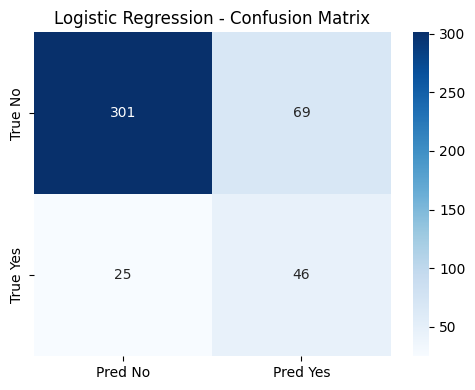


MODEL: Decision Tree
Accuracy: 0.8390022675736961
Precision (Yes): 0.5
Recall (Yes): 0.5633802816901409
F1 Score (Yes): 0.5298013245033113

Classification Report:

              precision    recall  f1-score   support

          No       0.91      0.89      0.90       370
         Yes       0.50      0.56      0.53        71

    accuracy                           0.84       441
   macro avg       0.71      0.73      0.72       441
weighted avg       0.85      0.84      0.84       441



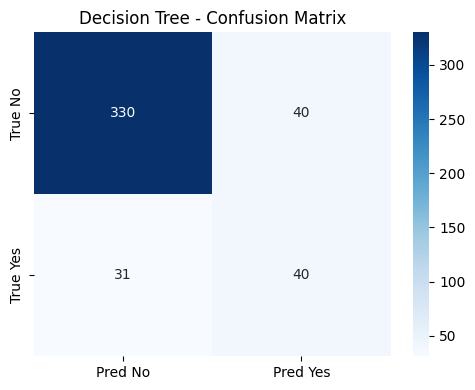


MODEL: Random Forest
Accuracy: 0.8639455782312925
Precision (Yes): 0.6486486486486487
Recall (Yes): 0.3380281690140845
F1 Score (Yes): 0.4444444444444444

Classification Report:

              precision    recall  f1-score   support

          No       0.88      0.96      0.92       370
         Yes       0.65      0.34      0.44        71

    accuracy                           0.86       441
   macro avg       0.77      0.65      0.68       441
weighted avg       0.85      0.86      0.85       441



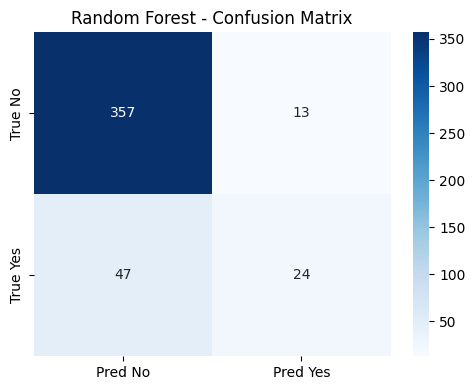


MODEL: Gradient Boosting
Accuracy: 0.854875283446712
Precision (Yes): 0.5945945945945946
Recall (Yes): 0.30985915492957744
F1 Score (Yes): 0.4074074074074074

Classification Report:

              precision    recall  f1-score   support

          No       0.88      0.96      0.92       370
         Yes       0.59      0.31      0.41        71

    accuracy                           0.85       441
   macro avg       0.74      0.63      0.66       441
weighted avg       0.83      0.85      0.84       441



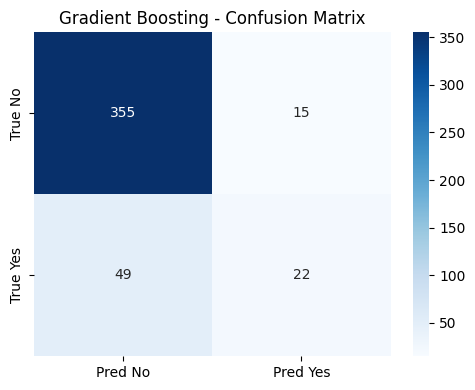


MODEL: SVM
Accuracy: 0.8571428571428571
Precision (Yes): 0.5645161290322581
Recall (Yes): 0.49295774647887325
F1 Score (Yes): 0.5263157894736842

Classification Report:

              precision    recall  f1-score   support

          No       0.91      0.93      0.92       370
         Yes       0.56      0.49      0.53        71

    accuracy                           0.86       441
   macro avg       0.73      0.71      0.72       441
weighted avg       0.85      0.86      0.85       441



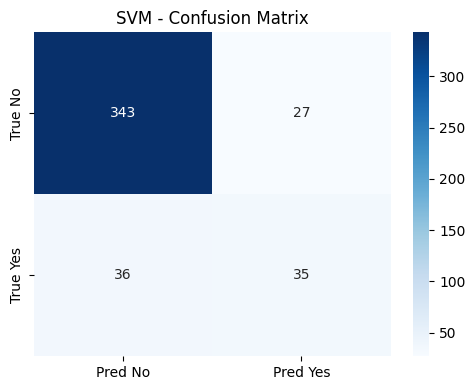


MODEL: KNN
Accuracy: 0.6485260770975056
Precision (Yes): 0.2692307692307692
Recall (Yes): 0.6901408450704225
F1 Score (Yes): 0.38735177865612647

Classification Report:

              precision    recall  f1-score   support

          No       0.92      0.64      0.75       370
         Yes       0.27      0.69      0.39        71

    accuracy                           0.65       441
   macro avg       0.59      0.67      0.57       441
weighted avg       0.81      0.65      0.69       441



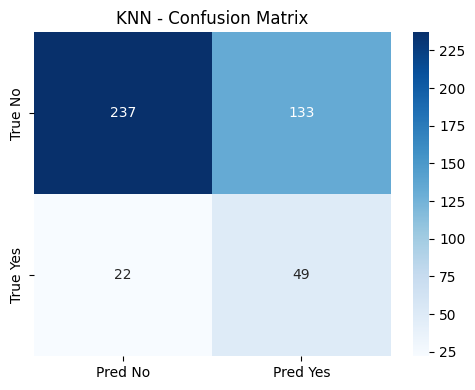


MODEL: Naive Bayes
Accuracy: 0.6961451247165533
Precision (Yes): 0.30434782608695654
Recall (Yes): 0.6901408450704225
F1 Score (Yes): 0.4224137931034483

Classification Report:

              precision    recall  f1-score   support

          No       0.92      0.70      0.79       370
         Yes       0.30      0.69      0.42        71

    accuracy                           0.70       441
   macro avg       0.61      0.69      0.61       441
weighted avg       0.82      0.70      0.73       441



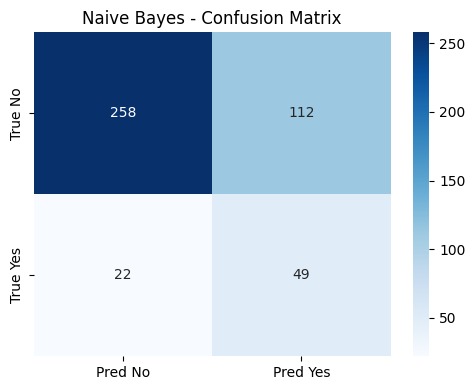


 Model Comparison Table:


,Model,Accuracy,Precision(Yes),Recall(Yes),F1(Yes)
2,Random Forest,0.863946,0.648649,0.338028,0.444444
4,SVM,0.857143,0.564516,0.492958,0.526316
3,Gradient Boosting,0.854875,0.594595,0.309859,0.407407
1,Decision Tree,0.839002,0.500000,0.563380,0.529801
0,Logistic Regression,0.786848,0.400000,0.647887,0.494624
6,Naive Bayes,0.696145,0.304348,0.690141,0.422414
5,KNN,0.648526,0.269231,0.690141,0.387352


In [28]:
# Step 13 Model evaluations
def evaluate_model(name, model, X_test_final, y_test_final):
    y_pred = model.predict(X_test_final)

    acc = accuracy_score(y_test_final, y_pred)
    prec = precision_score(y_test_final, y_pred, pos_label="Yes", zero_division=0)
    rec = recall_score(y_test_final, y_pred, pos_label="Yes", zero_division=0)
    f1 = f1_score(y_test_final, y_pred, pos_label="Yes", zero_division=0)

    print("\n" + "="*70)
    print(f"MODEL: {name}")
    print("Accuracy:", acc)
    print("Precision (Yes):", prec)
    print("Recall (Yes):", rec)
    print("F1 Score (Yes):", f1)

    print("\nClassification Report:\n")
    print(classification_report(y_test_final, y_pred, labels=["No", "Yes"]))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test_final, y_pred, labels=["No", "Yes"])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Pred No", "Pred Yes"],
                yticklabels=["True No", "True Yes"])
    plt.title(f"{name} - Confusion Matrix")
    plt.tight_layout()
    plt.show()

    return acc, prec, rec, f1

results = []

for name, model in trained_models.items():
    acc, prec, rec, f1 = evaluate_model(name, model, X_test_prep, y_test)
    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision(Yes)", "Recall(Yes)", "F1(Yes)"]
).sort_values(by=["Accuracy", "F1(Yes)"], ascending=False)

print("\n Model Comparison Table:")
results_df

In [ ]:
## Model selection justification
# Multiple classification algorithms were trained and evaluated to predict employee attrition using accuracy, 
# precision, recall, and F1-score. Random Forest achieved the highest accuracy; however, it showed lower recall 
# for attrition cases, indicating that several employees who left were not correctly identified. SVM and
# Gradient Boosting models demonstrated balanced performance but did not consistently detect attrition cases.
#  The Decision Tree model achieved accuracy above 80% and provided the best balance between recall and F1-score while remaining easy to interpret. Based on its balanced performance and interpretability, the Decision Tree model was selected as the final model and integrated into a Streamlit-based user interface to support data-driven employee retention decisions.

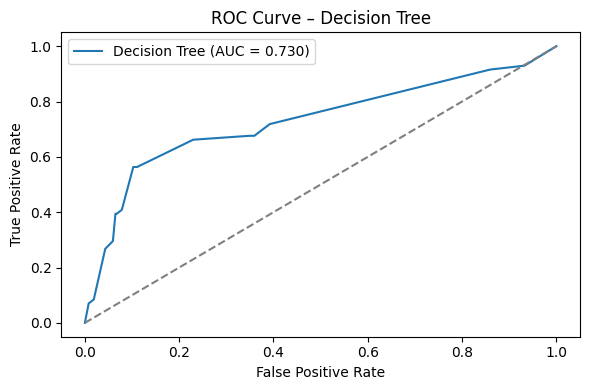

In [29]:
# 14a: ROC curve analysis of decision tree model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get probabilities for "Yes" class
dt_model = trained_models["Decision Tree"]
y_prob_dt = dt_model.predict_proba(X_test_prep)[:, 1]

# Convert target to binary
y_test_bin = (y_test == "Yes").astype(int)

# ROC values
fpr, tpr, _ = roc_curve(y_test_bin, y_prob_dt)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Decision Tree")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Interpretation ROC curve - Decision tree model
# The curve lies above the diagonal reference line. AUC value of 0.73 means that in about 73% of cases, 
# the model correctly ranks an employee who leaves higher than one who does not.

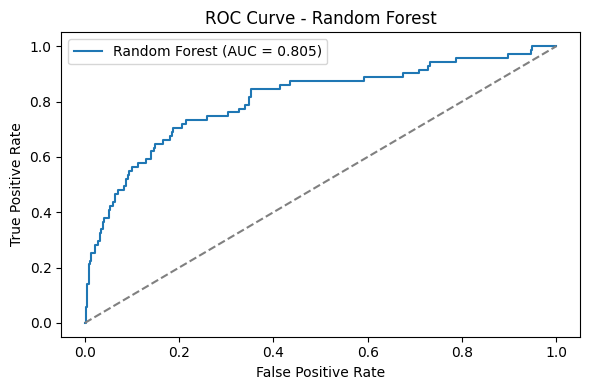

0.8054434716406547

In [30]:
# 14b: ROC curve analysis of Random Forest model for comparison
rf_model = trained_models["Random Forest"]

y_prob_rf = rf_model.predict_proba(X_test_prep)[:, 1]
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_test_bin = (y_test == "Yes").astype(int)

fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.tight_layout()
plt.show()

roc_auc_rf


In [31]:
#14c: Decision Tree visualization
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

DT_vis = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    random_state=42
)

DT_vis.fit(X_train_smote, y_train_smote)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


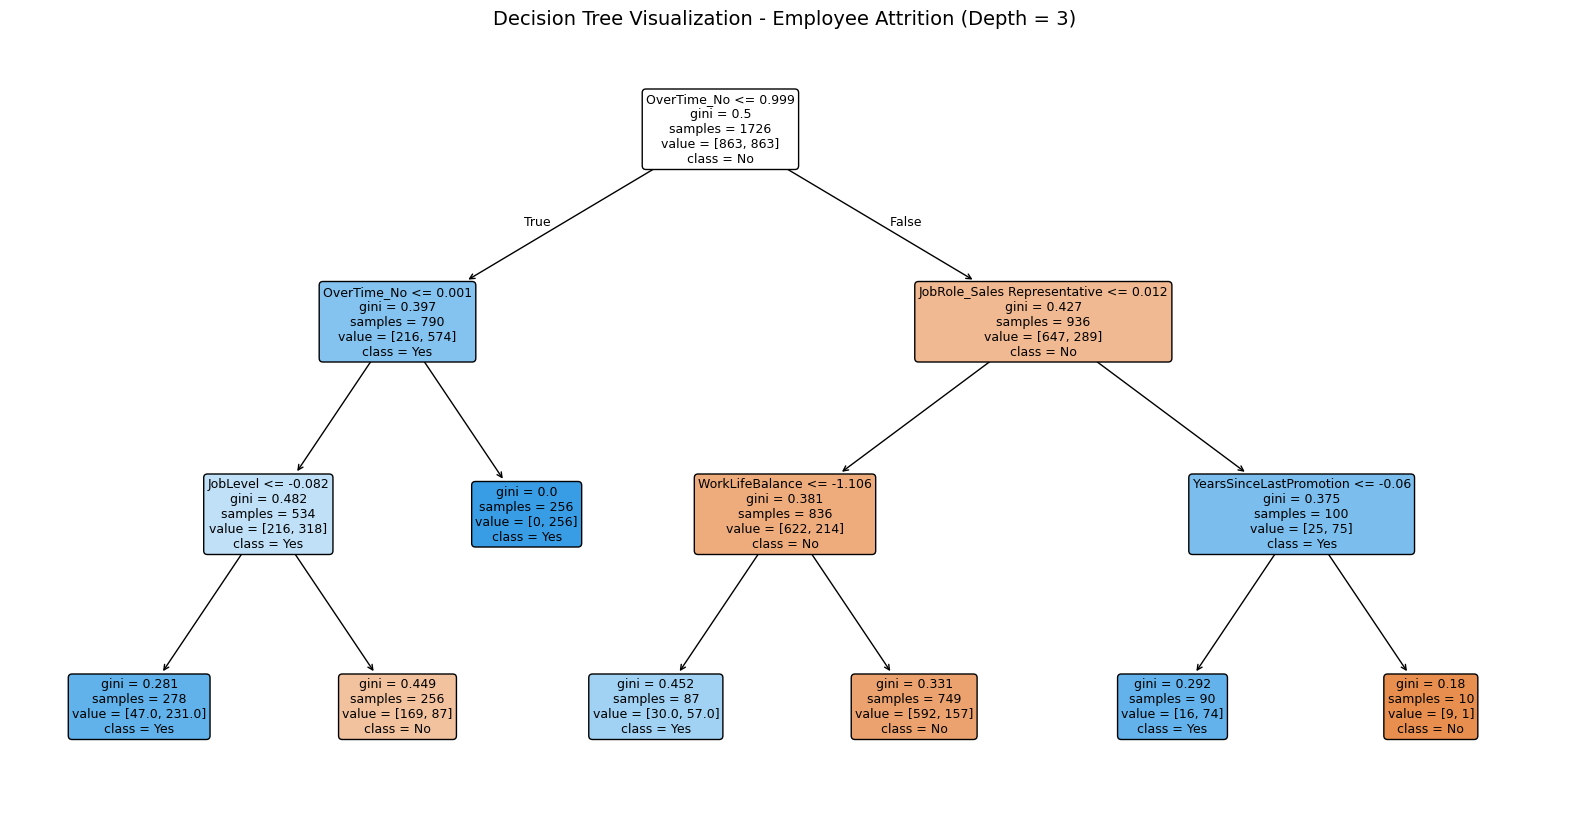

In [32]:
# Decision Tree visualization - continued
#  Numeric features
num_features = num_cols_model

# One-hot encoded categorical features
cat_features = (
    preprocessor.named_transformers_["cat"]
    .named_steps["encoder"]
    .get_feature_names_out(cat_cols_model)
)

feature_names = list(num_features) + list(cat_features)

plt.figure(figsize=(20,10))

tree.plot_tree(
    DT_vis,
    feature_names=feature_names,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=9,
    impurity=True,
    proportion=False
)

plt.title("Decision Tree Visualization - Employee Attrition (Depth = 3)", fontsize=14)
plt.show()


In [ ]:
# Interpretation - Decision tree plot
# The decision tree shows that overtime, job role, work-life balance,
# and promotion delays are the strongest drivers of employee attrition

In [33]:
# Step 15: Save the DT model and preprocessing pipeline
import joblib
joblib.dump(dt_model, "decision_tree_model.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")

print("Saved: decision_tree_model.pkl and preprocessor.pkl")

Saved: decision_tree_model.pkl and preprocessor.pkl
